In [29]:
%load_ext autoreload
%autoreload 2

In [5]:
# from nltk.tokenize import texttiling
import texttiling
import nltk

## Brown demo

In [ ]:
from nltk.corpus import brown
nltk.download('brown')
nltk.download('stopwords')

text = brown.raw()[:4000]

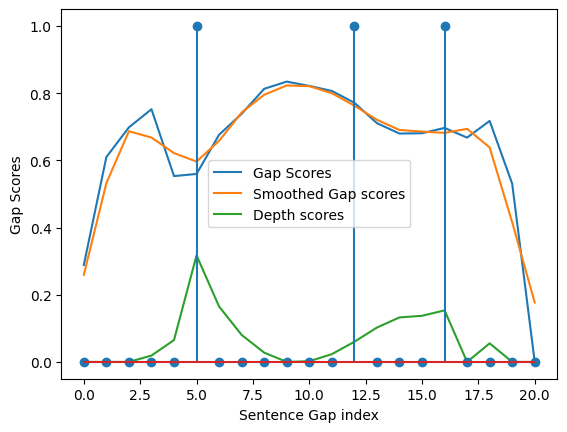

In [6]:
texttiling.demo(text)

In [ ]:
print(text[:1000])



	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.


	The/at jury/nn further/rbr said/vbd in/in term-end/nn presentments/nns that/cs the/at City/nn-tl Executive/jj-tl Committee/nn-tl ,/, which/wdt had/hvd over-all/jj charge/nn of/in the/at election/nn ,/, ``/`` deserves/vbz the/at praise/nn and/cc thanks/nns of/in the/at City/nn-tl of/in-tl Atlanta/np-tl ''/'' for/in the/at manner/nn in/in which/wdt the/at election/nn was/bedz conducted/vbn ./.


	The/at September-October/np term/nn jury/nn had/hvd been/ben charged/vbn by/in Fulton/np-tl Superior/jj-tl Court/nn-tl Judge/nn-tl Durwood/np Pye/np to/to investigate/vb reports/nns of/in possible/jj ``/`` irregularities/nns ''/'' in/in the/at hard-fought/jj primary/nn which/wdt was/bedz won/vbn by/in Mayor-nominate/nn-tl Ivan/np Allen/np Jr./

## Corus demo

In [2]:
def print_sections(sections):
    print(f"SECTION COUNT: {len(sections)}")
    for i, section in enumerate(sections):
        print(f'\n-- SECTION {i+1} START --')
        print(section)
        print('-- SECTION END --')

In [11]:
import wget

# url_lenta = 'https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz'
url_ria = 'https://github.com/RossiyaSegodnya/ria_news_dataset/raw/master/ria.json.gz'
filename = wget.download(url_ria)

In [62]:
from corus import load_ria

load_func = load_ria
corpus_path = 'data/ria.json.gz'
records = load_func(corpus_path)
skip = 2
for i in range(skip):
    rec = next(records)
print(rec.title)
print(rec.text)

луценко будет работать в команде тимошенко, если она победит в выборах
премьер-министр украины, кандидат в президенты юлия тимошенко в воскресенье в прямом эфире украинского телеканала 1+1 заявила, что в случае ее победы на выборах президента юрий луценко будет работать в ее команде.
17 января в украине состоялся первый тур выборов президента, по итогам которого виктор янукович набрал 35,32% голосов, а премьер-министр страны юлия тимошенко оказалась на втором месте с результатом 25,05%. второй тур выборов президента украины состоится 7 февраля.
парламент украины по инициативе партии регионов 28 января отправил в отставку главу мвд юрия луценко, однако премьер-министр юлия тимошенко внесла в кабмин его кандидатуру на утверждение первым замминистра внутренних дел с полномочиями и.о. министра. правительство единогласно поддержало это предложение. партия регионов оспорила это решение кабмина в суде.
"что касается новых назначений, то знаете, как народная мудрость гласит: не нужно говорить 

In [25]:
records_count = 3

records = load_func(corpus_path)
corpus = ''
sections_orig = []
for i in range(records_count):
    rec = next(records)
    corpus += rec.text
    if i < (records_count - 1):
        corpus += '\n\n'

    sections_orig.append(rec.text)

### Default text tiling approach

{'self': <texttiling.TextTilingTokenizer object at 0x00000255A62B2BD0>, 'w': 20, 'k': 10, 'similarity_method': 0, 'stopwords': None, 'smoothing_method': [0], 'smoothing_width': 2, 'smoothing_rounds': 1, 'cutoff_policy': 1, 'demo_mode': True}
Total segments: 8


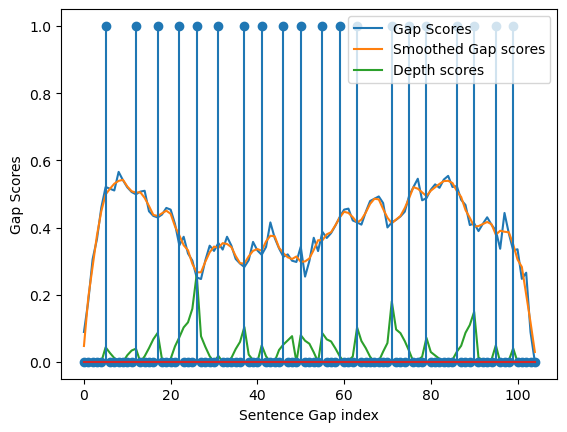

In [35]:
texttiling.demo(corpus)

In [53]:
print_sections(sections_orig)

SECTION COUNT: 3

-- SECTION 1 START --
большая часть из 33 детей, которых граждане сша пытались вывезти из гаити в организованный в доминиканской республике приют, не являются сиротами, сообщает в воскресенье агентство франс пресс со ссылкой на заявление представителя международной организации "детские деревни sos" (sos children's village), оказывающей помощь детям, оставшимся без родителей
как заявила агентству патрисия варгас (patricia vargas), курирующая программы "детских деревень sos" в центральной америке, мексике и на карибах, поговорив с детьми она выяснила, что родители многих из них живы. некоторые дети смогли назвать свои домашние адреса и номера телефонов, что дает возможность связаться с их родителями.
в это воскресенье гаитянская полиция задержала десятерых граждан сша, подозреваемых в попытке без разрешения вывезти более 30 детей в доминиканскую республику.
представитель баптистской церкви в городе меридиан американского штата айдахо шон лэнкфорд (sean lankford) заявил,

In [63]:
import texttiling
from nltk.corpus import stopwords

sw = set(stopwords.words('russian'))
tt = texttiling.TextTilingTokenizer(w=20, k=40, stopwords=sw)
sections = tt.tokenize(corpus)
print_sections(sections)

SECTION COUNT: 8

-- SECTION 1 START --
большая часть из 33 детей, которых граждане сша пытались вывезти из гаити в организованный в доминиканской республике приют, не являются сиротами, сообщает в воскресенье агентство франс пресс со ссылкой на заявление представителя международной организации "детские деревни sos" (sos children's village), оказывающей помощь детям, оставшимся без родителей
как заявила агентству патрисия варгас (patricia vargas), курирующая программы "детских деревень sos" в центральной америке, мексике и на карибах, поговорив с детьми она выяснила, что родители многих из них живы. некоторые дети смогли назвать свои домашние адреса и номера телефонов, что дает возможность связаться с их родителями.
в это воскресенье гаитянская полиция задержала десятерых граждан сша, подозреваемых в попытке без разрешения вывезти более 30 детей в доминиканскую республику.
представитель баптистской церкви в городе меридиан американского штата айдахо шон лэнкфорд (sean lankford) заявил,

### Sentence embeddings approach

In [2]:
# https://github.com/comfyanonymous/ComfyUI/issues/2055#issuecomment-1886530393
# !conda install chardet

from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [22]:
#Load AutoModel from huggingface model repository
tokenizer = AutoTokenizer.from_pretrained("ai-forever/sbert_large_nlu_ru")
model = AutoModel.from_pretrained("ai-forever/sbert_large_nlu_ru")

c:\Users\User\Desktop\news-segmentation\.conda\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [23]:
#Sentences we want sentence embeddings for
sentences = [
    'Привет! Как твои дела?',
    'Приветствую тебя. Интересно, как у тебя идут дела?',
    'А правда, что 42 твое любимое число?',
    ]

In [35]:
def calc_embeddings(sentences):
    #Tokenize sentences
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=24, return_tensors='pt')

    #Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    #Perform pooling. In this case, mean pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    return sentence_embeddings

In [36]:
embs = calc_embeddings(sentences)

In [33]:
a = sentence_embeddings[:-1, :]
b = sentence_embeddings[1:, :]
cossim(a, b)

tensor([0.8381, 0.2963])

In [32]:
i = 0
cossim = nn.CosineSimilarity(dim=1)
cossim(sentence_embeddings[[i], :], sentence_embeddings[[i+1], :])

tensor([0.8381])

In [ ]:
for i in range(len(sentence_embeddings.shape[0]))

In [ ]:
# Measure similarity between subsequent sentences
similarity_scores = cossim(
    list(zip(sentences_joined[:-1], sentences_joined[1:]))
    , model
).tolist()

In [8]:
import tiktoken
from typing import List
import numpy as np
import torch.nn as nn
from nltk.tokenize.texttiling import TextTilingTokenizer

def embd_cossim_predict_chunk_startpoints(
    document: str,
    encoder: tiktoken.core.Encoding,
    sentence_end_string: int,
    model: AutoModel,
) -> List[int]:
    # List all possible startpoints (position of token subsequent to a
    # "sentence_end_string")
    sentence_end_token = encoder.encode(
        sentence_end_string, allowed_special={sentence_end_string}
    )
    assert len(sentence_end_token) == 1

    document_tks = encoder.encode(
        document, allowed_special={sentence_end_string}
    )

    possible_startpoints = [
        i + 1 for i, token in enumerate(document_tks)
        if token == sentence_end_token[0]
    ]

    # Split the document into sentences
    sentences = [
        sentence for sentence in document.split(sentence_end_string)
        if sentence != ""
    ]
    sentences_joined = []
    for i in range(len(sentences) // 2):
        sentences_joined.append(
            sentences[i * 2] + sentences[i * 2 + 1]
        )
    if len(sentences) % 2 == 1:
        sentences_joined.append(sentences[-1])
    
    possible_startpoints = [
        sp for i, sp in enumerate(possible_startpoints) if i % 2 == 0
    ]

    # Measure similarity between subsequent sentences
    similarity_scores = sentences_cossim(
        list(zip(sentences_joined[:-1], sentences_joined[1:]))
        , model
    ).tolist()

    # Return points with similarit that are "too low"
    tiling_tokenizer = TextTilingTokenizer()
    s = smooth(
        np.array(similarity_scores),
        window_len=min(len(sentences_joined) // 9, 11)
    )

    segment_boundaries = tiling_tokenizer._identify_boundaries(
        tiling_tokenizer._depth_scores(s)
    )

    return [0] + [
        sp for sp, bdr in zip(possible_startpoints, segment_boundaries)
        if bdr > 0
    ]

NameError: name 'SentenceTransformer' is not defined

In [ ]:
encoder = tiktoken.encoding_for_model("gpt-4o")
embd_cossim_predict_chunk_startpoints(doc, encoder)

In [38]:
doc = " ".join(sentences)
doc

'Привет! Как твои дела? Приветствую тебя. Интересно, как у тебя идут дела? А правда, что 42 твое любимое число?'

### Bugfix

In [3]:
import re

text = 'Text'
# m = re.match(r"[a-z\-' \n\t]", text)
m = re.search(r'[a-z]', text)
print(m[0])

text = 'текст'
m = re.search(r'[а-я]*', text)
print(m[0])

e
текст


In [5]:
sample = corpus[:100]
sample = 'вице-премьер по социальным вопросам татьяна голикова рассказала, в каких регионах россии зафиксирова'
sample

'вице-премьер по социальным вопросам татьяна голикова рассказала, в каких регионах россии зафиксирова'

In [6]:
import re

lowercase_text = sample.lower()
nopunct_text = "".join(
            c for c in lowercase_text if re.match(r"[a-zа-я-' \n\t]", c)
        )
nopunct_text

'вице-премьер по социальным вопросам татьяна голикова рассказала в каких регионах россии зафиксирова'

## 20 NewsGroups

In [29]:
from sklearn.datasets import fetch_20newsgroups

cats = ['alt.atheism', 'sci.space']

newsgroups = fetch_20newsgroups(subset='train', categories=cats,
                                      remove= ('headers', 'footers', 'quotes'))

In [76]:
def sort_by_cats(newsgroups):
    newsgroups_sorted = []
    for _ in range(len(newsgroups.target_names)):
        newsgroups_sorted.append([])

    for i, data in enumerate(newsgroups.data):
        if len(data) > 0:
            newsgroups_sorted[newsgroups.target[i]].append(data)
    return(newsgroups_sorted)

In [77]:
news_sorted = sort_by_cats(newsgroups)

In [71]:
len(news_sorted[0])

480

In [78]:
import numpy as np
np.random.seed(42)

corpus = ''
corpus_orig = []

records_count = 3
last_group = -1
for i in range(records_count):
    while True:
        curr_group = np.random.randint(0, len(newsgroups.target_names))
        if curr_group != last_group:
            break

    news_id = np.random.randint(0, len(news_sorted[curr_group]))
    news = news_sorted[curr_group][news_id]

    corpus += news
    if i < (records_count - 1):
        corpus += '\n\n'

    corpus_orig.append(news)

In [16]:
print_sections(corpus)

NameError: name 'corpus_orig' is not defined

In [81]:
import texttiling

tt = texttiling.TextTilingTokenizer(w=10)
sections = tt.tokenize(corpus)
print(len(sections))
for section in sections:
    print('\n-- SECTION START --')
    print(section)
    print('-- SECTION END --')

3

-- SECTION START --

I find these to be intriguing remarks.   Could you give us a bit
more explanation here?   For example, which religion is anti-semitic,
and which aesthetic?
-- SECTION END --

-- SECTION START --


 
(Deletion)
 
Read a history book, Fred. And tell me why so many religions command to
commit genocide when it has got nothing to do with religion. Or why so many
religions say that not living up to the standards of the religion is worse
than dieing? Coincidence, I assume. Or ist part of the absolute morality
you describe so often?
-- SECTION END --

-- SECTION START --



How about the nickname Bake "Flamethrower" Timmons?

You weren't at the Koresh compound around noon today by any chance, were you?

Remember, Koresh "dried" for your sins.  
-- SECTION END --
